In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import itertools

In [2]:
train_dataset = pd.read_csv('train.csv')
census_dataset = pd.read_csv('census_starter.csv')

In [3]:
train_dataset['cfips'] = train_dataset['cfips'].astype("string")

In [4]:
train_dataset.describe()

,microbusiness_density,active
count,122265.000000,1.222650e+05
mean,3.817671,6.442858e+03
std,4.991087,3.304001e+04
min,0.000000,0.000000e+00
25%,1.639344,1.450000e+02
50%,2.586543,4.880000e+02
75%,4.519231,2.124000e+03
max,284.340030,1.167744e+06


In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122265 non-null  object 
 1   cfips                  122265 non-null  string 
 2   county                 122265 non-null  object 
 3   state                  122265 non-null  object 
 4   first_day_of_month     122265 non-null  object 
 5   microbusiness_density  122265 non-null  float64
 6   active                 122265 non-null  int64  
dtypes: float64(1), int64(1), object(4), string(1)
memory usage: 6.5+ MB


In [6]:
train_dataset['first_day_of_month'] = pd.to_datetime(train_dataset.first_day_of_month, format='%Y-%m-%d')

In [7]:
train_dataset['year']= train_dataset['first_day_of_month'].dt.year

In [8]:
train_dataset.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,2019
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,2019
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,2019
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,2019


In [9]:
census_dataset['cfips'] = census_dataset['cfips'].astype("string")

In [10]:
census_dataset.describe()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,pct_college_2021,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
count,3142.000000,3142.000000,3142.000000,3141.000000,3141.000000,3142.000000,3142.000000,3142.000000,3141.000000,3141.000000,...,3142.000000,3141.000000,3142.000000,3141.000000,3141.000000,3142.000000,3141.000000,3142.000000,3140.000000,3140.000000
mean,69.920401,72.690866,75.398600,78.543298,80.539096,13.813399,14.005379,14.240452,14.631328,14.851226,...,1.427148,1.382171,1.338956,1.309265,1.272684,49754.163908,51583.175422,53475.909612,55012.443312,58223.339490
std,9.702052,9.255863,8.846665,8.250864,7.889931,5.586649,5.630199,5.689780,5.776940,5.832285,...,0.986985,0.942777,0.940891,0.990342,0.968579,13154.424871,13703.502202,14192.529173,14649.568591,15541.038914
min,24.500000,25.700000,34.800000,33.300000,37.000000,2.400000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,19264.000000,20188.000000,21504.000000,22292.000000,17109.000000
25%,64.200000,67.425000,70.500000,74.100000,76.400000,9.700000,9.900000,10.100000,10.500000,10.600000,...,0.800000,0.800000,0.700000,0.700000,0.600000,41123.000000,42480.000000,44155.000000,45653.000000,48179.500000
50%,70.700000,73.600000,76.450000,79.600000,81.700000,12.800000,13.000000,13.250000,13.600000,13.800000,...,1.300000,1.300000,1.200000,1.200000,1.100000,48065.500000,49888.000000,51757.500000,52842.000000,55907.000000
75%,76.400000,78.800000,81.400000,84.100000,85.900000,16.800000,17.100000,17.300000,17.900000,18.000000,...,1.900000,1.800000,1.800000,1.800000,1.700000,55763.500000,57611.000000,59867.250000,61500.750000,64930.000000
max,94.600000,95.500000,96.000000,97.100000,97.600000,43.700000,48.000000,45.400000,43.000000,43.700000,...,17.400000,11.700000,10.500000,15.200000,15.200000,129588.000000,136268.000000,142299.000000,147111.000000,156821.000000


In [11]:
census_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pct_bb_2017            3142 non-null   float64
 1   pct_bb_2018            3142 non-null   float64
 2   pct_bb_2019            3142 non-null   float64
 3   pct_bb_2020            3141 non-null   float64
 4   pct_bb_2021            3141 non-null   float64
 5   cfips                  3142 non-null   string 
 6   pct_college_2017       3142 non-null   float64
 7   pct_college_2018       3142 non-null   float64
 8   pct_college_2019       3142 non-null   float64
 9   pct_college_2020       3141 non-null   float64
 10  pct_college_2021       3141 non-null   float64
 11  pct_foreign_born_2017  3142 non-null   float64
 12  pct_foreign_born_2018  3142 non-null   float64
 13  pct_foreign_born_2019  3142 non-null   float64
 14  pct_foreign_born_2020  3141 non-null   float64
 15  pct_

In [12]:
census_dataset.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


In [13]:
census_dataset[pd.isnull(census_dataset["pct_bb_2021"])]

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
92,80.5,79.1,80.4,NaN,NaN,2261,23.1,19.0,16.5,NaN,...,3.3,3.9,5.3,NaN,NaN,86019,82306.0,79867,NaN,NaN


In [14]:
nan_df = census_dataset[census_dataset.isnull().any(axis=1)]
nan_ls = list(nan_df.index)
print(nan_ls)

[92, 1816, 2644, 2673]


In [15]:
cleaned_census_dataset = census_dataset.drop(index=nan_ls,inplace = False)
cleaned_census_dataset.reset_index(inplace=True)

In [16]:
cleaned_census_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  3138 non-null   int64  
 1   pct_bb_2017            3138 non-null   float64
 2   pct_bb_2018            3138 non-null   float64
 3   pct_bb_2019            3138 non-null   float64
 4   pct_bb_2020            3138 non-null   float64
 5   pct_bb_2021            3138 non-null   float64
 6   cfips                  3138 non-null   string 
 7   pct_college_2017       3138 non-null   float64
 8   pct_college_2018       3138 non-null   float64
 9   pct_college_2019       3138 non-null   float64
 10  pct_college_2020       3138 non-null   float64
 11  pct_college_2021       3138 non-null   float64
 12  pct_foreign_born_2017  3138 non-null   float64
 13  pct_foreign_born_2018  3138 non-null   float64
 14  pct_foreign_born_2019  3138 non-null   float64
 15  pct_

In [17]:
transaction_col = ['cfips','year','pct_bb','pct_college','pct_foreign_born','pct_it_workers','median_hh_inc']
transaction_df = pd.DataFrame(columns=transaction_col)

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
# import tqdm
from tqdm import tqdm

In [20]:
cleaned_census_dict = cleaned_census_dataset.to_dict(orient='index')

for index in tqdm(np.arange(len(cleaned_census_dataset))):
    current_row = cleaned_census_dict[index]
    for year in [2017,2018,2019,2020,2021]:
        row_dict = dict.fromkeys(transaction_col)
        row_dict['cfips']=current_row['cfips']
        row_dict['year']=year
        row_dict['pct_bb']=current_row['pct_bb_' + (str)(year)]
        row_dict['pct_college']=current_row['pct_college_' + (str)(year)]
        row_dict['pct_foreign_born']=current_row['pct_foreign_born_' + (str)(year)]
        row_dict['pct_it_workers']=current_row['pct_it_workers_' + (str)(year)]
        row_dict['median_hh_inc']=current_row['median_hh_inc_' + (str)(year)]
        transaction_df = transaction_df.append(row_dict, ignore_index=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 3138/3138 [00:20<00:00, 152.79it/s]


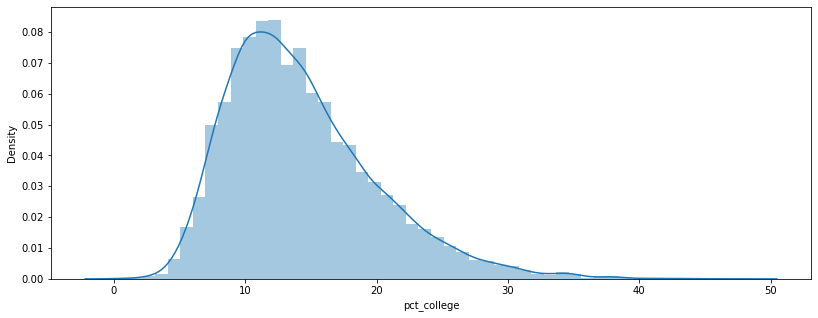

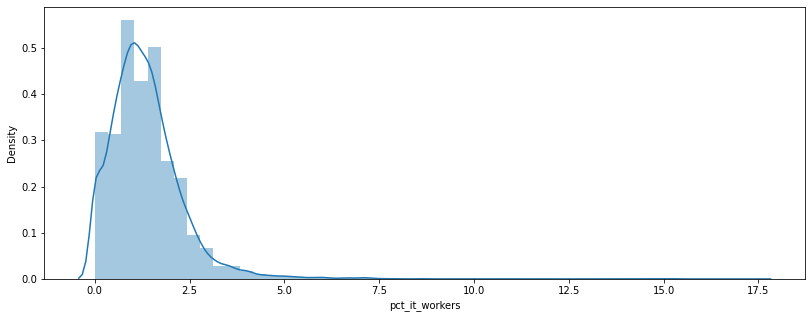

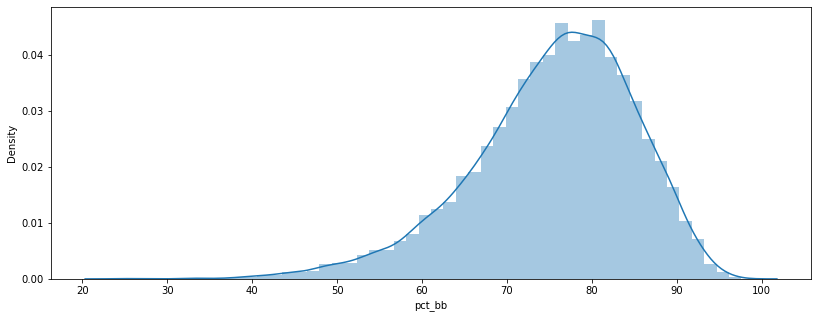

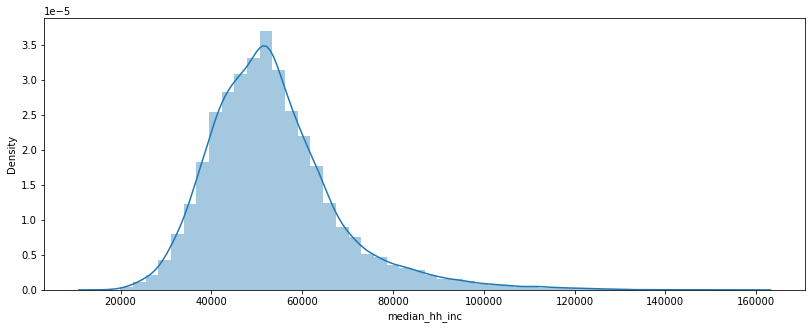

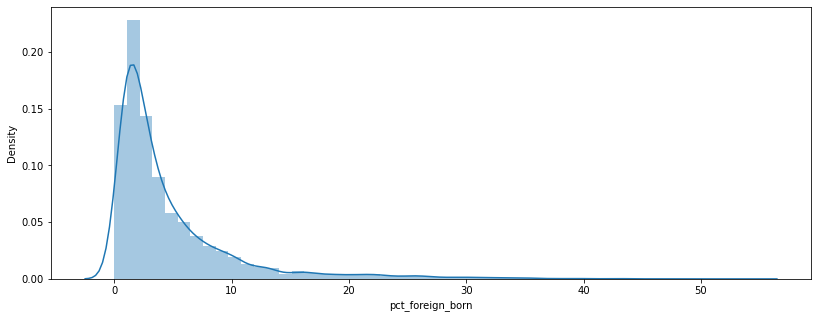

In [21]:
# plot the distribution for a 5 random columns
import matplotlib.pyplot as plt
import seaborn as sns
import random

cols = list(transaction_df.columns)
cols.remove('cfips')
cols.remove('year')
random_cols = random.sample(cols, 5)

# plot the cfips and and the distrinution of the 5 random columns
for col in random_cols:
    plt.figure(figsize=(30, 5))
    plt.subplot(1, 2, 1)
    sns.distplot(transaction_df[col])
    plt.show()

In [22]:
transaction_df.head()

,cfips,year,pct_bb,pct_college,pct_foreign_born,pct_it_workers,median_hh_inc
0,1001,2017,76.6,14.5,2.1,1.3,55317
1,1001,2018,78.9,15.9,2.0,1.1,58786.0
2,1001,2019,80.6,16.1,2.3,0.7,58731
3,1001,2020,82.7,16.7,2.3,0.6,57982.0
4,1001,2021,85.5,16.4,2.1,1.1,62660.0


In [23]:
merge_df = pd.merge(transaction_df, train_dataset, on=['cfips','year'])

In [24]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90828 entries, 0 to 90827
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   cfips                  90828 non-null  object        
 1   year                   90828 non-null  object        
 2   pct_bb                 90828 non-null  float64       
 3   pct_college            90828 non-null  float64       
 4   pct_foreign_born       90828 non-null  float64       
 5   pct_it_workers         90828 non-null  float64       
 6   median_hh_inc          90828 non-null  object        
 7   row_id                 90828 non-null  object        
 8   county                 90828 non-null  object        
 9   state                  90828 non-null  object        
 10  first_day_of_month     90828 non-null  datetime64[ns]
 11  microbusiness_density  90828 non-null  float64       
 12  active                 90828 non-null  int64         
dtypes

In [25]:
merge_df.head()

,cfips,year,pct_bb,pct_college,pct_foreign_born,pct_it_workers,median_hh_inc,row_id,county,state,first_day_of_month,microbusiness_density,active
0,1001,2019,80.6,16.1,2.3,0.7,58731,1001_2019-08-01,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001,2019,80.6,16.1,2.3,0.7,58731,1001_2019-09-01,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001,2019,80.6,16.1,2.3,0.7,58731,1001_2019-10-01,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001,2019,80.6,16.1,2.3,0.7,58731,1001_2019-11-01,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001,2019,80.6,16.1,2.3,0.7,58731,1001_2019-12-01,Autauga County,Alabama,2019-12-01,2.993233,1243


In [26]:
preprocessed_X =merge_df[['pct_bb','pct_college','pct_foreign_born','pct_it_workers','median_hh_inc','county','state']]

In [27]:
preprocessed_X.head()

,pct_bb,pct_college,pct_foreign_born,pct_it_workers,median_hh_inc,county,state
0,80.6,16.1,2.3,0.7,58731,Autauga County,Alabama
1,80.6,16.1,2.3,0.7,58731,Autauga County,Alabama
2,80.6,16.1,2.3,0.7,58731,Autauga County,Alabama
3,80.6,16.1,2.3,0.7,58731,Autauga County,Alabama
4,80.6,16.1,2.3,0.7,58731,Autauga County,Alabama


In [90]:
X = pd.get_dummies(preprocessed_X, columns=['county','state'], drop_first=True)

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct_model = ColumnTransformer([
        ('somename', StandardScaler(), ['pct_bb','pct_college','pct_foreign_born','pct_it_workers','median_hh_inc'])
    ], remainder='passthrough')

X=ct_model.fit_transform(X)

In [31]:
X = np.asarray(X).astype('float32')
y = merge_df['microbusiness_density']

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

model = Sequential()
model.add(Dense(20, input_shape=(1923,), kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=[MeanSquaredError(), MeanAbsoluteError()])

2023-02-16 19:51:14.248106: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-16 19:51:27.518283: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-16 19:51:47.360712: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /iitgoafs/DDN_Benchmark/openmpi-4.0.5/exe/lib:/opt/ohpc/pub/mpi/ucx-ohpc/1.11.2/lib:/op

In [33]:
model.fit(X, y, epochs=20, batch_size=10)

Epoch 1/20
9083/9083 [==============================] - 10s 968us/step - loss: 12.5800 - mean_squared_error: 12.5800 - mean_absolute_error: 1.0481
Epoch 2/20
9083/9083 [==============================] - 9s 1ms/step - loss: 9.1945 - mean_squared_error: 9.1945 - mean_absolute_error: 0.7594
Epoch 3/20
9083/9083 [==============================] - 9s 1ms/step - loss: 7.9984 - mean_squared_error: 7.9984 - mean_absolute_error: 0.7038
Epoch 4/20
9083/9083 [==============================] - 9s 1ms/step - loss: 7.2776 - mean_squared_error: 7.2776 - mean_absolute_error: 0.6625
Epoch 5/20
9083/9083 [==============================] - 9s 1ms/step - loss: 6.8131 - mean_squared_error: 6.8131 - mean_absolute_error: 0.6258
Epoch 6/20
9083/9083 [==============================] - 9s 1ms/step - loss: 6.5070 - mean_squared_error: 6.5070 - mean_absolute_error: 0.6088
Epoch 7/20
9083/9083 [==============================] - 9s 941us/step - loss: 6.2694 - mean_squared_error: 6.2694 - mean_absolute_error: 0.5938

In [34]:
y_predicted= model.predict(X)
y_predicted = list(itertools.chain(*y_predicted))

2839/2839 [==============================] - 2s 636us/step


In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mean_absolute_error : ",mean_absolute_error(y, y_predicted))
print("mean_squared_error : ",mean_squared_error(y, y_predicted))

mean_absolute_error :  0.47206071357359375
mean_squared_error :  5.228574155838851


In [36]:
predicted_result = pd.DataFrame(columns=['Expected','Actual'])
predicted_result['Actual'] = list(y_predicted)
predicted_result['Expected'] = list(y)

In [37]:
predicted_result

,Expected,Actual
0,3.007682,2.963553
1,2.884870,2.963553
2,3.055843,2.963553
3,2.993233,2.963553
4,2.993233,2.963553
...,...,...
90823,1.670559,2.791786
90824,1.688522,2.791786
90825,1.670559,2.791786
90826,1.760374,2.791786


In [38]:
model = Sequential()
model.add(Dense(100, input_shape=(1923,), kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=[MeanSquaredError(),MeanAbsoluteError()])

model.fit(X, y, epochs=50, batch_size=10)

Epoch 1/50
9083/9083 [==============================] - 18s 2ms/step - loss: 8.8743 - mean_squared_error: 8.8743 - mean_absolute_error: 0.8250
Epoch 2/50
9083/9083 [==============================] - 17s 2ms/step - loss: 6.0627 - mean_squared_error: 6.0627 - mean_absolute_error: 0.5418
Epoch 3/50
9083/9083 [==============================] - 17s 2ms/step - loss: 5.9099 - mean_squared_error: 5.9099 - mean_absolute_error: 0.4584
Epoch 4/50
9083/9083 [==============================] - 17s 2ms/step - loss: 5.4713 - mean_squared_error: 5.4713 - mean_absolute_error: 0.4272
Epoch 5/50
9083/9083 [==============================] - 17s 2ms/step - loss: 5.1833 - mean_squared_error: 5.1833 - mean_absolute_error: 0.3906
Epoch 6/50
9083/9083 [==============================] - 17s 2ms/step - loss: 5.1293 - mean_squared_error: 5.1293 - mean_absolute_error: 0.3750
Epoch 7/50
9083/9083 [==============================] - 17s 2ms/step - loss: 4.8120 - mean_squared_error: 4.8120 - mean_absolute_error: 0.3590

In [39]:
y_predicted= model.predict(X)
y_predicted = list(itertools.chain(*y_predicted))

2839/2839 [==============================] - 2s 859us/step


In [40]:
print("mean_absolute_error : ",mean_absolute_error(y, y_predicted))
print("mean_squared_error : ",mean_squared_error(y, y_predicted))

mean_absolute_error :  0.2208225214580748
mean_squared_error :  2.331540577352587


In [76]:
# predict for all cfips for the next 8 months starting from 2022-11-01 to 2023-06-01
df_test = pd.DataFrame(index=train_dataset['cfips'], columns=pd.date_range(start='2022-11-01', periods=8, freq='MS'))
df_test.head()

,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01
cfips,,,,,,,,
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# predict for the next 8 months and make a submission file